In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import random
import datetime as dt
import matplotlib.pyplot as plt

import scipy.optimize as sco

from diff_cap_packages import Xy, filters, ta
from diff_cap_packages import portfolio_analyze as pa
from diff_cap_packages import stock_selection, models_

In [2]:
X, y = Xy.get_market_Xy(percent_change=False, target_ahead_by=0)
prices, vols, info, _ = Xy.get_data_defaults()
listings = Xy.get_listings_df('data/listings_july2021.csv')

In [3]:
training_end_date = '2021-06-30'
num_days = 200

In [4]:
X = filters.get_dataframe_prices(training_end_date)
X

,930060,314909,997026,930523,923904,930529,936978,936977,317439,895185,916237,950506,152279,316684,540852,152162,277122,950511,776872,916592,930106,152204,315436,932125,916481,152181,26040Q,702044,14801U,871044,871041,292813,317381,921634,152214,923037,884675,741931,871109,756379,696846,152228,923257,286001,265386,359960,689116,922708,982545,930995,950918,687385,315840,923816,680190,879664,26714J,27127J,26592U,317437,317286,28165E,29659T,898357,152459,29593D,152190,317446,36086P,41303Q,41447E,50320U,51297V,53708F,54271D,54221D,950534,67018P,50762X,68627D,69588W,74556J,75756H,69320W,67426F,50894E,87206X,91423P,8945F7,86974U,317449,68976P,8909KF,7289NA,93119R,2562XT,2736ZT,8914PL,8747J8,9225R0,9160EQ,9062FT,9313LM,9405H4,96147L
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-09-14,84.12,89.73,10.78,1312.83,415.82,494.67,72.98,215.30,128.24,374.53,62.50,152.24,3.25,2.63,122.88,21.23,133.46,23.33,40.25,91.20,233.80,3.75,3.41,103.06,175.99,36.48,30.23,12.40,134.29,57.15,1.10,34.48,133.27,5.50,2958.00,103.08,13.32,15.60,236.23,182.48,10.65,43.76,48.80,2.38,88.67,32.51,54.50,25.54,133.70,149.88,116.00,0.78,20.54,188.87,36.19,35.53,24.30,40.10,38.65,17.14,18.00,6.03,182.17,8.78,12.41,4.79,2.43,30.65,121.56,547.61,2.45,20.45,3.30,40.00,568.49,294.35,58.02,125.04,323.70,12.35,17.15,31.00,8.99,26.14,70.25,5.19,20.87,3.75,3.41,1.66,11.99,10.10,58.50,272.00,38.78,5.80,19.40,16.95,7.05,16.38,11.70,2.80,29.03,87.67,54.22
2020-09-15,83.30,88.46,10.25,1281.23,415.79,488.06,73.91,209.57,126.55,376.90,62.85,148.70,3.14,2.68,121.36,21.05,134.94,22.40,39.55,86.82,237.59,3.75,3.21,106.86,170.26,36.48,28.90,12.54,133.97,56.82,1.18,32.81,131.76,5.20,2967.11,101.15,13.22,15.26,228.43,187.46,10.44,43.27,48.07,2.38,89.78,32.82,54.52,24.55,129.25,149.00,113.14,0.74,21.30,188.50,35.00,34.64,23.67,40.10,39.20,16.65,18.35,6.10,180.43,9.04,12.50,4.70,2.41,29.39,119.12,533.49,2.43,19.25,3.18,39.98,574.20,299.21,57.55,124.83,326.07,12.38,17.61,31.00,9.00,26.00,71.09,5.24,20.70,3.85,3.48,1.66,11.98,10.19,60.31,269.45,39.44,5.75,18.38,16.96,6.95,16.01,11.71,2.75,28.95,86.44,53.61
2020-09-16,84.54,89.43,10.67,1284.10,417.34,480.40,74.23,210.20,123.00,379.23,62.34,148.85,3.47,3.03,118.67,21.11,129.80,22.00,39.62,82.24,235.00,3.80,3.30,101.96,167.56,37.26,29.47,12.55,133.00,58.22,1.23,31.78,129.50,5.00,2955.00,101.36,13.12,14.99,228.41,186.35,10.37,44.59,47.54,2.44,89.00,33.89,53.98,24.50,135.77,144.36,113.41,0.77,21.37,187.41,34.18,33.78,23.90,39.06,38.75,16.90,18.15,5.88,179.11,9.05,12.52,5.01,2.74,30.00,118.95,528.20,2.44,19.00,3.23,39.85,568.05,303.77,56.96,124.98,333.45,12.39,17.47,30.52,8.99,25.89,72.10,5.40,21.40,3.94,3.50,1.67,12.00,10.14,58.75,270.00,39.32,5.56,18.48,16.87,6.90,15.80,11.77,2.95,29.25,88.75,52.92
2020-09-17,80.80,88.91,10.94,1225.00,412.90,451.32,75.22,203.41,122.69,369.69,64.00,145.68,3.56,3.20,115.96,23.36,130.15,21.07,40.07,80.34,220.01,3.95,3.40,93.46,157.96,37.22,29.03,13.66,130.00,57.78,1.30,31.56,131.00,4.80,2908.59,102.61,13.32,14.95,229.64,178.50,10.16,44.50,47.65,2.46,89.89,33.06,53.86,25.51,136.65,143.22,111.75,0.76,20.79,188.34,34.55,36.00,25.38,39.16,38.50,18.18,18.28,5.85,180.79,8.90,12.60,5.04,2.62,29.88,119.40,509.46,2.43,19.00,3.20,39.90,569.18,299.00,55.82,125.87,330.41,12.70,17.53,30.29,9.34,25.81,73.25,5.15,21.47,3.88,3.50,1.63,12.00,10.25,59.19,269.48,38.74,5.20,18.31,16.81,6.93,15.73,12.04,2.75,28.89,88.99,50.50
2020-09-18,78.31,85.58,10.53,1219.58,414.97,445.72,75.12,204.65,119.52,374.71,62.71,144.10,3.45,3.15,113.20,22.20,130.97,20.00,39.11,78.07,218.21,3.75,3.44,92.60,158.66,36.06,29.20,13.10,130.95,57.44,1.23,29.72,128.54,4.44,2895.00,98.76,12.97,15.15,232.68,177.40,10.07,44.01,47.82,2.40,88.89,31.09,52.87,25.33,137.99,143.18,107.89,0.75,21.05,187.07,33.31,35.20,25.00,39.11,37.53,17.99,17.89,5.95,187.63,9.35,12.30,4.77,2.51,29.90,119.05,511.49,2.41,19.53,3.30,39.45,561.55,299.07,55.11,124.54,336.60,12.60,17.22,30.63,9.20,24.88,69.23,5.15,21.46,3.85,

In [5]:
%time stock_selection.make_and_store_linear_models(training_end_date, num_days, force_overwrite=True)

100%|██████████| 105/105 [00:54<00:00,  1.94it/s]


Wall time: 54.4 s


In [6]:
%time lrmodels = stock_selection.load_models(training_end_date, num_days)

100%|██████████| 105/105 [00:01<00:00, 58.33it/s]

Wall time: 1.83 s


In [7]:
common_features = models_.get_common_features(training_end_date, num_days)
common_features = common_features.loc[[common_features.index[-1]]]
models_.get_dataframe_for_pycaret('930060', training_end_date, num_days, common_features).iloc[[-1]]

,930060,314909,997026,930523,923904,930529,936978,936977,317439,895185,916237,950506,152279,316684,540852,152162,277122,950511,776872,916592,930106,152204,315436,932125,916481,152181,26040Q,702044,14801U,871044,871041,292813,317381,921634,152214,923037,884675,741931,871109,756379,696846,152228,923257,286001,265386,359960,689116,922708,982545,930995,950918,687385,315840,923816,680190,879664,26714J,27127J,26592U,317437,317286,28165E,29659T,898357,152459,29593D,152190,317446,36086P,41303Q,41447E,50320U,51297V,53708F,54271D,54221D,950534,67018P,50762X,68627D,69588W,74556J,75756H,69320W,67426F,50894E,87206X,91423P,8945F7,86974U,317449,68976P,8909KF,7289NA,93119R,2562XT,2736ZT,8914PL,8747J8,9225R0,9160EQ,9062FT,9313LM,9405H4,96147L,ATR_14,OBV,930060 +1 day
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-06-30,98.31,135.72,8.46,1649.41,569.42,265.49,71.05,255.35,162.09,422.24,106.54,190.46,2.86,3.51,173.62,27.56,126.27,14.93,53.59,159.04,128.4,7.95,4.86,52.76,235.49,47.42,57.11,18.21,168.42,103.23,2.11,63.0,210.52,10.35,2998.19,170.87,14.24,19.5,245.69,216.93,13.5,79.59,52.75,4.28,114.6,50.72,61.37,41.38,218.01,155.44,127.61,1.89,31.06,209.0,57.68,53.91,46.37,48.5,52.15,26.5,22.5,9.85,180.89,14.25,14.9,11.51,4.13,54.52,106.3,640.59,2.87,32.64,4.2,44.3,554.2,280.23,61.76,128.77,376.0,13.58,22.72,31.34,10.56,31.81,101.22,3.41,37.82,6.86,4.15,2.79,16.67,18.18,59.0,309.61,61.18,7.42,32.15,18.88,8.23,21.85,20.16,4.23,29.46,117.34,59.66,1.010575,33830700.0,NaN


In [8]:
%time predictions = stock_selection.get_predictions(lrmodels, training_end_date, num_days)

Predictions not detected. Calculating and saving...


100%|██████████| 105/105 [00:25<00:00,  4.15it/s]

Wall time: 25.6 s


# Portfolio Analysis

For now we will use a random 10 stocks
Eventually we will figure out what to change the weights to, we can use portfolio optimization for that and we can use the package pypfopt to do that.

In [9]:
buy_sell = stock_selection.get_buy_sell(predictions, how_many=5)
buy_sell

,predicted % chg,actual % chg,predicted action
932125,0.05621,NaN,BUY
687385,0.04636,NaN,BUY
930523,0.045197,NaN,BUY
997026,0.041873,NaN,BUY
9062FT,0.041404,NaN,BUY
26714J,-0.041504,NaN,SELL
315840,-0.043647,NaN,SELL
29593D,-0.046996,NaN,SELL
317449,-0.055725,NaN,SELL
317437,-0.062446,NaN,SELL


In [13]:
stock_selection.get_buys_from_buy_sell(buy_sell)

array(['932125', '687385', '930523', '997026', '9062FT'], dtype=object)

In [14]:
stock_selection.get_sells_from_buy_sell(buy_sell)

array(['26714J', '315840', '29593D', '317449', '317437'], dtype=object)

In [15]:
stock_selection.get_buy_sell_analysis(buy_sell)

100%|██████████| 10/10 [00:00<00:00, 1002.68it/s]


,predicted % chg,actual % chg,predicted action,proper action,ACCURATE (HOLD = True)
932125,0.05621,NaN,BUY,HOLD,True
687385,0.04636,NaN,BUY,HOLD,True
930523,0.045197,NaN,BUY,HOLD,True
997026,0.041873,NaN,BUY,HOLD,True
9062FT,0.041404,NaN,BUY,HOLD,True
26714J,-0.041504,NaN,SELL,HOLD,True
315840,-0.043647,NaN,SELL,HOLD,True
29593D,-0.046996,NaN,SELL,HOLD,True
317449,-0.055725,NaN,SELL,HOLD,True
317437,-0.062446,NaN,SELL,HOLD,True


In [16]:
long_returns = X[stock_selection.get_buys_from_buy_sell(buy_sell)].pct_change()
short_returns = X[stock_selection.get_sells_from_buy_sell(buy_sell)].pct_change() * -1
portfolio_df = pa.connect_long_short(long_returns, short_returns)

common_features = models_.get_common_features(pa.get_prev_next_trading_day(Xy.get_prices_df(), training_end_date)[1], num_days)
long_1day = common_features.loc[:, stock_selection.get_buys_from_buy_sell(buy_sell)].pct_change().iloc[[-1]]
short_1day = common_features.loc[:, stock_selection.get_sells_from_buy_sell(buy_sell)].pct_change().iloc[[-1]] * -1
portfolio_df_1day = pa.connect_long_short(long_1day, short_1day)
# portfolio_df_1day = portfolio_df_1day.loc[[portfolio_df_1day.index[-1]], portfolio_df.columns]

portfolio_df = portfolio_df[(portfolio_df.index >= X.index[0]) & (portfolio_df.index <= X.index[-1])]

IndexError: index 0 is out of bounds for axis 0 with size 0

## Graphing

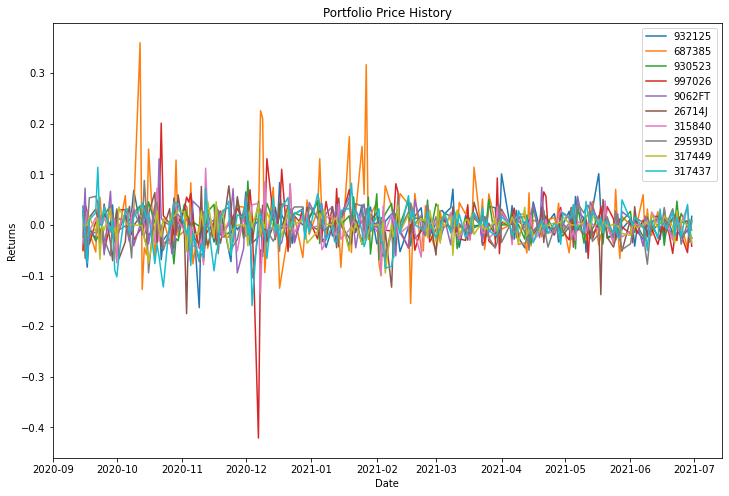

In [17]:
plt.figure(figsize=(12,8))

plt.plot(portfolio_df)

plt.title('Portfolio Price History')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend(portfolio_df.columns, loc='upper right')
plt.show()

In [18]:
# annual_cov_matrix = portfolio_df.cov() * len(portfolio_df.index)
# annual_cov_matrix

In [19]:
temp_weights = np.array(len(portfolio_df.columns)*[1./len(portfolio_df.columns)])
ret, risk = pa.get_return(temp_weights, portfolio_df), pa.get_volatility(temp_weights, portfolio_df)

In [20]:
# print('Expected return:', round(ret, 2) * 100, '%')
# print('volatility (risk):', round(risk, 2) * 100, '%')

In [21]:
np.sum(portfolio_df_1day.mean() * temp_weights)

NameError: name 'portfolio_df_1day' is not defined

In [22]:
stock_selection.get_actual_overall_pct_chg(buy_sell)

nan

In [23]:
stock_selection.get_predicted_overall_pct_chg(buy_sell)

0.048136260819690885

A good rule of thumb for sharpe ratios is: \
Less than 1: Bad \
1-1.99: Good \
2-2.99: Very Good \
3+: Excellent 

In [24]:
def portfolio_annualised_performance(weights, portfolio_df):
    num_trading_days = len(portfolio_df.index)
    returns = np.sum(portfolio_df.mean()*weights ) * num_trading_days
    std = np.sqrt(np.dot(weights.T, np.dot(portfolio_df.cov(), weights))) * np.sqrt(num_trading_days)
    return std, returns

In [25]:
def neg_sharpe_ratio(weights, portfolio_df, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, portfolio_df)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(portfolio_df, risk_free_rate):
    num_assets = len(portfolio_df.mean())
    args = (portfolio_df, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [26]:
def portfolio_volatility(weights, portfolio_df):
    return portfolio_annualised_performance(weights, portfolio_df)[0]

def min_variance(portfolio_df):
    num_assets = len(portfolio_df.mean())
    args = (portfolio_df)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(pa.get_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

In [27]:
def efficient_return(portfolio_df, target):
    num_assets = len(portfolio_df.mean())
    args = (portfolio_df)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, portfolio_df)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(portfolio_df, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(portfolio_df, ret))
    return efficients

In [28]:
def display_ef_with_selected(portfolio_df, risk_free_rate):
    num_trading_days = len(portfolio_df.index)
    
    max_sharpe = max_sharpe_ratio(portfolio_df, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], portfolio_df)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=portfolio_df.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(portfolio_df)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], portfolio_df)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=portfolio_df.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    an_vol = np.std(portfolio_df) * np.sqrt(num_trading_days)
    an_rt = portfolio_df.mean() * num_trading_days
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Return:", round(rp,2))
    print ("Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Return:", round(rp_min,2))
    print ("Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    print ("-"*80)
    print ("Individual Stock Returns and Volatility\n")
    for i, txt in enumerate(portfolio_df.columns):
        print (txt,":","return",round(an_rt[i],2),", volatility:",round(an_vol[i],2))
    print ("-"*80)
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(an_vol,an_rt,marker='o',s=200)

    for i, txt in enumerate(portfolio_df.columns):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    ax.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.34, 50)
    efficient_portfolios = efficient_frontier(portfolio_df, target)
    ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    ax.set_title('Portfolio Optimization with Individual Stocks')
    ax.set_xlabel('volatility')
    ax.set_ylabel('returns')
    ax.legend(labelspacing=0.8)

In [29]:
optimized_weights = pa.monte_carlo_SR(portfolio_df, 100000)
display(optimized_weights)

array([0.04682974, 0.30632148, 0.07003243, 0.11084328, 0.33624075,
       0.02381763, 0.00423531, 0.02596588, 0.01727825, 0.05843527])

In [30]:
pa.monte_carlo_SR(portfolio_df, 100000, 0)

array([0.00262877, 0.22371272, 0.20168247, 0.14172105, 0.2247042 ,
       0.05992662, 0.01364843, 0.00419254, 0.09066669, 0.03711652])

In [31]:
pa.max_SR(portfolio_df, 0)

     fun: -1.924025985757904
     jac: array([ 2.09803812e+00, -1.73045695e-03, -6.33805990e-04, -4.11093235e-04,
        1.38166547e-03,  2.04421470e+00,  1.29426205e+00,  2.77053411e+00,
        7.79027909e-01,  1.71304020e+00])
 message: 'Optimization terminated successfully'
    nfev: 127
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([0.00000000e+00, 2.36106456e-01, 3.08958926e-01, 1.41625725e-02,
       4.40772045e-01, 0.00000000e+00, 5.10592362e-16, 0.00000000e+00,
       9.29837318e-16, 0.00000000e+00])

In [32]:
pa.min_variance(portfolio_df)

     fun: 0.13284161866711533
     jac: array([0.13297788, 0.13328578, 0.13302868, 0.13240107, 0.13290485,
       0.13268735, 0.13285378, 0.13289344, 0.13276203, 0.13304446])
 message: 'Optimization terminated successfully'
    nfev: 90
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([0.04333488, 0.03348168, 0.18676969, 0.08215456, 0.14095285,
       0.10560675, 0.1040623 , 0.06672428, 0.22983223, 0.00708077])

In [ ]:
pa.test_all_models(portfolio_df, portfolio_df_1day, 100000, 0)

In [ ]:
display_ef_with_selected(portfolio_df, 0)